In [1]:
import matplotlib.artist as artist
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.transforms import IdentityTransform


class ItemProperties:
    def __init__(self, fontsize=14, labelcolor='black', bgcolor='yellow',
                 alpha=1.0):
        self.fontsize = fontsize
        self.labelcolor = labelcolor
        self.bgcolor = bgcolor
        self.alpha = alpha


class MenuItem(artist.Artist):
    padx = 5
    pady = 5

    def __init__(self, fig, labelstr, props=None, hoverprops=None,
                 on_select=None):
        super().__init__()

        self.set_figure(fig)
        self.labelstr = labelstr

        self.props = props if props is not None else ItemProperties()
        self.hoverprops = (
            hoverprops if hoverprops is not None else ItemProperties())
        if self.props.fontsize != self.hoverprops.fontsize:
            raise NotImplementedError(
                'support for different font sizes not implemented')

        self.on_select = on_select

        # Setting the transform to IdentityTransform() lets us specify
        # coordinates directly in pixels.
        self.label = fig.text(0, 0, labelstr, transform=IdentityTransform(),
                              size=props.fontsize)
        self.text_bbox = self.label.get_window_extent(
            fig.canvas.get_renderer())

        self.rect = patches.Rectangle((0, 0), 1, 1)  # Will be updated later.

        self.set_hover_props(False)

        fig.canvas.mpl_connect('button_release_event', self.check_select)

    def check_select(self, event):
        over, _ = self.rect.contains(event)
        if not over:
            return
        if self.on_select is not None:
            self.on_select(self)

    def set_extent(self, x, y, w, h, depth):
        self.rect.set(x=x, y=y, width=w, height=h)
        self.label.set(position=(x + self.padx, y + depth + self.pady/2))
        self.hover = False

    def draw(self, renderer):
        self.rect.draw(renderer)
        self.label.draw(renderer)

    def set_hover_props(self, b):
        props = self.hoverprops if b else self.props
        self.label.set(color=props.labelcolor)
        self.rect.set(facecolor=props.bgcolor, alpha=props.alpha)

    def set_hover(self, event):
        """
        Update the hover status of event and return whether it was changed.
        """
        b, _ = self.rect.contains(event)
        changed = (b != self.hover)
        if changed:
            self.set_hover_props(b)
        self.hover = b
        return changed


class Menu:
    def __init__(self, fig, menuitems):
        self.figure = fig

        self.menuitems = menuitems

        maxw = max(item.text_bbox.width for item in menuitems)
        maxh = max(item.text_bbox.height for item in menuitems)
        depth = max(-item.text_bbox.y0 for item in menuitems)

        x0 = 100
        y0 = 400

        width = maxw + 2*MenuItem.padx
        height = maxh + MenuItem.pady

        for item in menuitems:
            left = x0
            bottom = y0 - maxh - MenuItem.pady

            item.set_extent(left, bottom, width, height, depth)

            fig.artists.append(item)
            y0 -= maxh + MenuItem.pady

        fig.canvas.mpl_connect('motion_notify_event', self.on_move)

    def on_move(self, event):
        if any(item.set_hover(event) for item in self.menuitems):
            self.figure.canvas.draw()


fig = plt.figure()
fig.subplots_adjust(left=0.3)
props = ItemProperties(labelcolor='black', bgcolor='yellow',
                       fontsize=15, alpha=0.2)
hoverprops = ItemProperties(labelcolor='white', bgcolor='blue',
                            fontsize=15, alpha=0.2)

menuitems = []
for label in ('open', 'close', 'save', 'save as', 'quit'):
    def on_select(item):
        print('you selected %s' % item.labelstr)
    item = MenuItem(fig, label, props=props, hoverprops=hoverprops,
                    on_select=on_select)
    menuitems.append(item)

menu = Menu(fig, menuitems)
plt.show()

<Figure size 432x288 with 0 Axes>

In [2]:
plt.show()

In [3]:
ls

README.md                             attractors_panel.ipynb
Untitled.ipynb                        clifford_19_19_19_08_5e7_dimgray.png
__pycache__/                          clifford_19_19_19_08_5e7_kbc.png
anaconda-project.yml                  clifford_maps/
attractors.ipynb                      clifford_panel.ipynb
attractors.py                         strange_attractors.yml
attractors.yml


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


# Fixing random state for reproducibility
np.random.seed(19680801)

NUM = 250

ells = [Ellipse(xy=np.random.rand(6) * 20,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

"""fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
"""


plt.savefig('ellipse1.png', dpi=300, transparent = True)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 204800x204800 with 0 Axes>

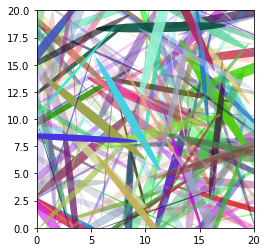